<a href="https://colab.research.google.com/github/AbdusSattar2025/Assignments/blob/main/NN_1st_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Topology: [10]
Epoch 0: Train Loss=1.1479, Val Loss=1.1662
Epoch 10: Train Loss=1.0264, Val Loss=1.0322
Epoch 20: Train Loss=0.8344, Val Loss=0.8460
Epoch 30: Train Loss=0.6341, Val Loss=0.6528
Epoch 40: Train Loss=0.4525, Val Loss=0.4806
Epoch 50: Train Loss=0.3168, Val Loss=0.3401
Epoch 60: Train Loss=0.2213, Val Loss=0.2333
Epoch 70: Train Loss=0.1604, Val Loss=0.1650
Epoch 80: Train Loss=0.1247, Val Loss=0.1276
Epoch 90: Train Loss=0.1027, Val Loss=0.1066


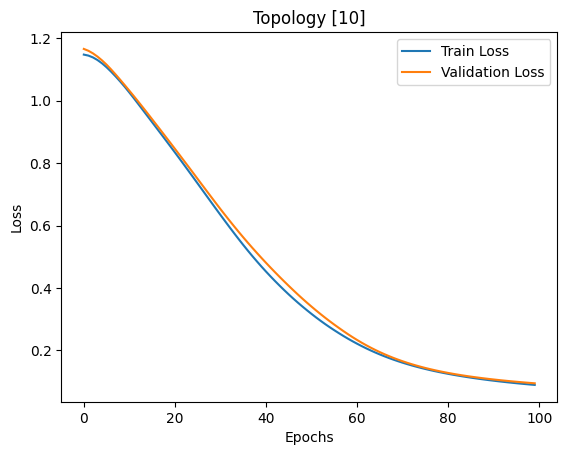

Test Accuracy for [10]: 1.0000

Topology: [20, 10]
Epoch 0: Train Loss=1.1137, Val Loss=1.1519
Epoch 10: Train Loss=1.0723, Val Loss=1.0958
Epoch 20: Train Loss=0.9948, Val Loss=1.0058
Epoch 30: Train Loss=0.8899, Val Loss=0.8927
Epoch 40: Train Loss=0.7412, Val Loss=0.7414
Epoch 50: Train Loss=0.5511, Val Loss=0.5519
Epoch 60: Train Loss=0.3618, Val Loss=0.3654
Epoch 70: Train Loss=0.2194, Val Loss=0.2297
Epoch 80: Train Loss=0.1368, Val Loss=0.1545
Epoch 90: Train Loss=0.0939, Val Loss=0.1158


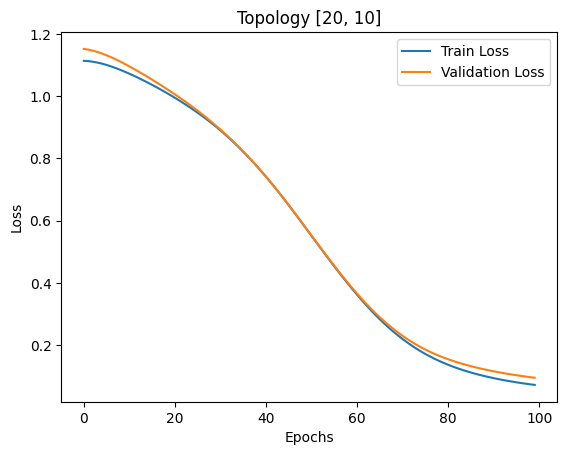

Test Accuracy for [20, 10]: 1.0000

Topology: [50, 20]
Epoch 0: Train Loss=1.1205, Val Loss=1.1358
Epoch 10: Train Loss=1.0565, Val Loss=1.0598
Epoch 20: Train Loss=0.9491, Val Loss=0.9432
Epoch 30: Train Loss=0.8053, Val Loss=0.7957
Epoch 40: Train Loss=0.6281, Val Loss=0.6320
Epoch 50: Train Loss=0.4496, Val Loss=0.4665
Epoch 60: Train Loss=0.3019, Val Loss=0.3165
Epoch 70: Train Loss=0.2024, Val Loss=0.2096
Epoch 80: Train Loss=0.1436, Val Loss=0.1487
Epoch 90: Train Loss=0.1089, Val Loss=0.1170


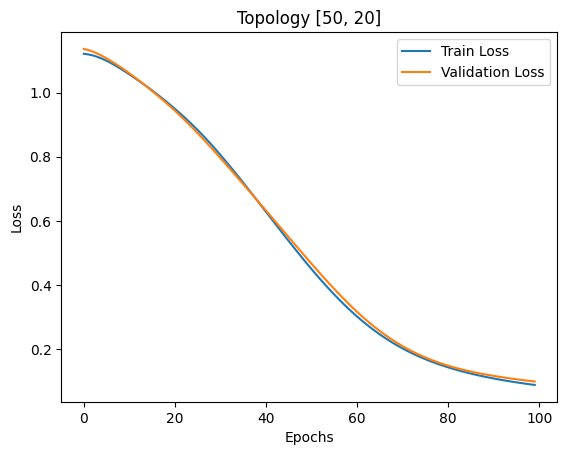

Test Accuracy for [50, 20]: 1.0000

Topology: [50, 30, 10]
Epoch 0: Train Loss=1.1047, Val Loss=1.0893
Epoch 10: Train Loss=1.0958, Val Loss=1.0809
Epoch 20: Train Loss=1.0833, Val Loss=1.0705
Epoch 30: Train Loss=1.0719, Val Loss=1.0603
Epoch 40: Train Loss=1.0587, Val Loss=1.0474
Epoch 50: Train Loss=1.0399, Val Loss=1.0290
Epoch 60: Train Loss=1.0100, Val Loss=0.9998
Epoch 70: Train Loss=0.9587, Val Loss=0.9490
Epoch 80: Train Loss=0.8660, Val Loss=0.8572
Epoch 90: Train Loss=0.7108, Val Loss=0.7043


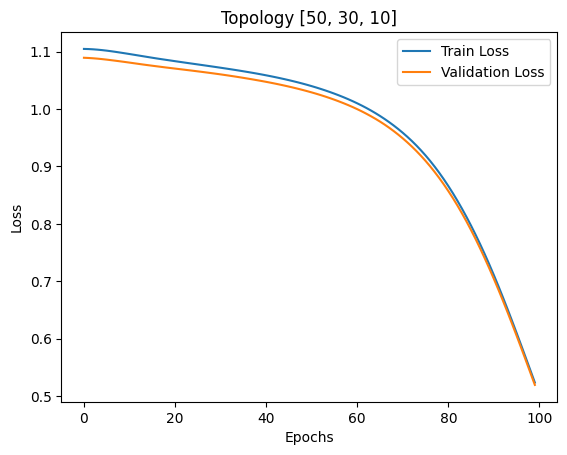

Test Accuracy for [50, 30, 10]: 0.9444

Topology: [100, 50, 20]
Epoch 0: Train Loss=1.1070, Val Loss=1.1017
Epoch 10: Train Loss=1.0832, Val Loss=1.0742
Epoch 20: Train Loss=1.0430, Val Loss=1.0325
Epoch 30: Train Loss=0.9873, Val Loss=0.9771
Epoch 40: Train Loss=0.8882, Val Loss=0.8783
Epoch 50: Train Loss=0.7188, Val Loss=0.7138
Epoch 60: Train Loss=0.4987, Val Loss=0.5091
Epoch 70: Train Loss=0.3019, Val Loss=0.3180
Epoch 80: Train Loss=0.1712, Val Loss=0.1769
Epoch 90: Train Loss=0.1036, Val Loss=0.1082


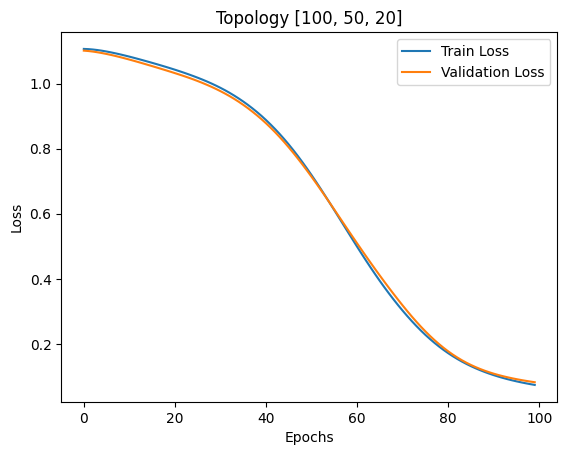

Test Accuracy for [100, 50, 20]: 1.0000


In [ ]:
# --- STEP 1: Import libraries ---
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- STEP 2: Load dataset ---
data = load_wine()
X = data.data
y = data.target

# Split into train/val/test (60/20/20)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# --- STEP 3: Define MLP Model ---
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(MLP, self).__init__()
        layers = []
        in_size = input_size
        for h in hidden_layers:
            layers.append(nn.Linear(in_size, h))
            layers.append(nn.ReLU())
            in_size = h
        layers.append(nn.Linear(in_size, output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# --- STEP 4: Train function ---
def train(model, X_train, y_train, X_val, y_val, lr=0.01, momentum=0.0, weight_decay=0.0, epochs=100):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)

    train_loss_list = []
    val_loss_list = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_loss_list.append(loss.item())

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            val_loss_list.append(val_loss.item())

        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Train Loss={loss.item():.4f}, Val Loss={val_loss.item():.4f}")

    return train_loss_list, val_loss_list

# --- STEP 5: Helper plot function ---
def plot_loss(train_loss, val_loss, title):
    plt.figure()
    plt.plot(train_loss, label="Train Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.show()

# --- STEP 6: Experiment setup ---
input_size = X_train.shape[1]
output_size = len(set(y_train.numpy()))

topologies = [
    [10],
    [20,10],
    [50,20],
    [50,30,10],
    [100,50,20]
]

for hidden_layers in topologies:
    print("\n==============================")
    print(f"Topology: {hidden_layers}")
    model = MLP(input_size, hidden_layers, output_size)
    train_loss, val_loss = train(model, X_train, y_train, X_val, y_val, lr=0.01, momentum=0.9, weight_decay=0.01, epochs=100)
    plot_loss(train_loss, val_loss, f"Topology {hidden_layers}")

    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        _, preds = torch.max(outputs, 1)
        acc = (preds == y_test).float().mean()
        print(f"Test Accuracy for {hidden_layers}: {acc:.4f}")



Training Topology: [10]
✅ Topology [10] Test MSE: 0.5591

Training Topology: [20, 10]
✅ Topology [20, 10] Test MSE: 0.5226

Training Topology: [50, 20]
✅ Topology [50, 20] Test MSE: 0.4989

Training Topology: [50, 30, 10]
✅ Topology [50, 30, 10] Test MSE: 0.5114

Training Topology: [100, 50, 20]
✅ Topology [100, 50, 20] Test MSE: 0.5101


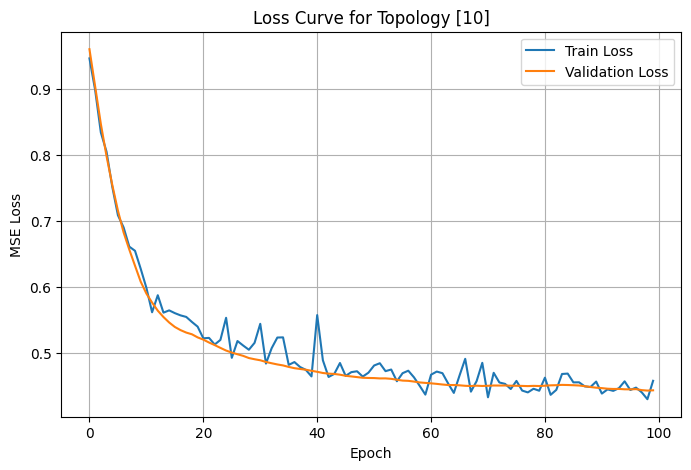

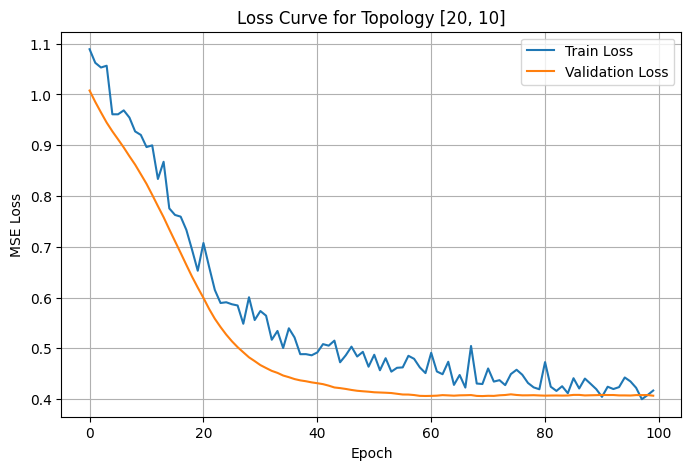

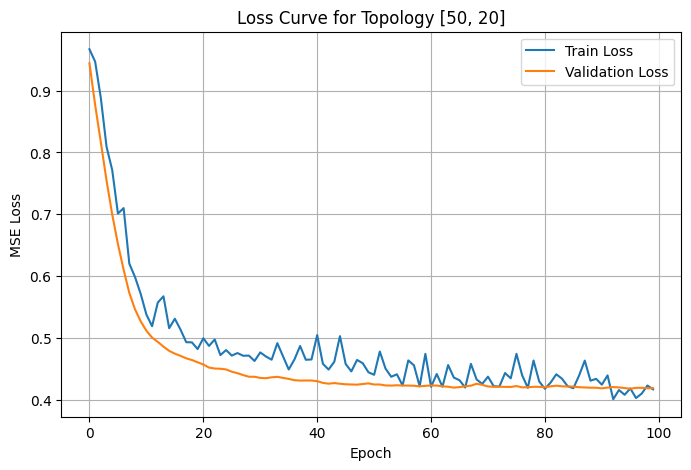

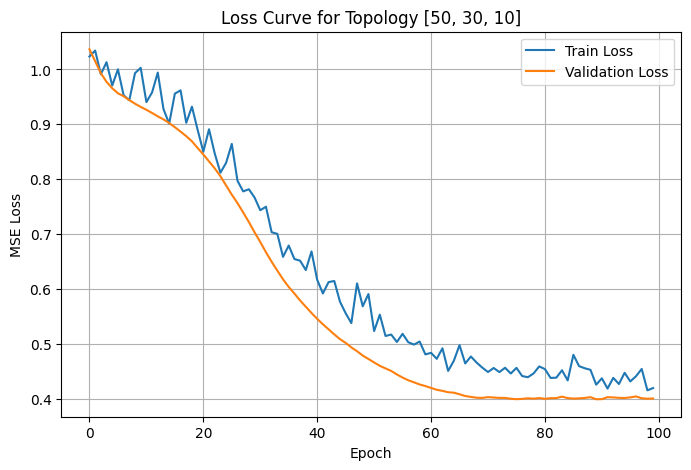

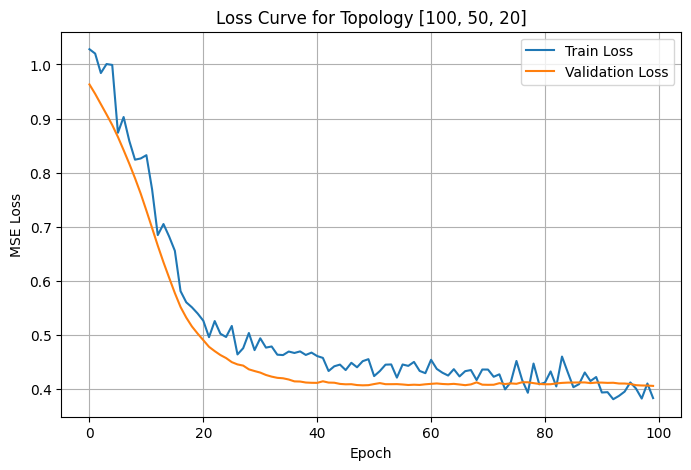

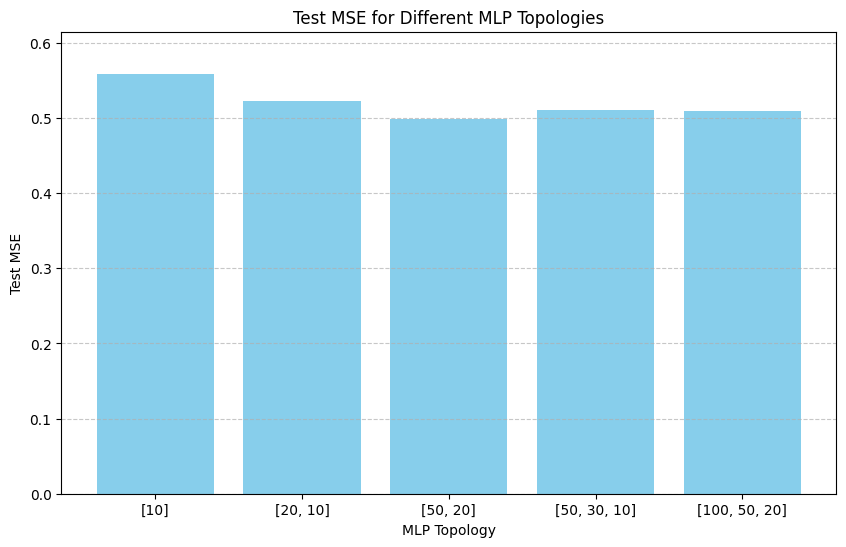

In [ ]:
# ==========================================
# Regression with MLP (Auto Train & Plot)
# Dataset: Diabetes
# ==========================================

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# ---- 1. Load dataset ----
data = load_diabetes()
X = data.data
y = data.target

# ---- 2. Split dataset ----
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ---- 3. Standardize ----
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.reshape(-1,1)).ravel()
y_val = scaler_y.transform(y_val.reshape(-1,1)).ravel()
y_test = scaler_y.transform(y_test.reshape(-1,1)).ravel()

# ---- 4. Convert to tensors ----
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_val_t = torch.tensor(X_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# ---- 5. Dataloaders ----
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=32)

# ---- 6. Define MLP ----
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_layers):
        super().__init__()
        layers = []
        prev = input_dim
        for h in hidden_layers:
            layers.append(nn.Linear(prev, h))
            layers.append(nn.ReLU())
            prev = h
        layers.append(nn.Linear(prev, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# ---- 7. Training function ----
def train_model(hidden_layers, epochs=100, lr=0.001):
    model = MLP(X_train.shape[1], hidden_layers)
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=0.01)

    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # Train
        model.train()
        total_loss = 0
        for xb, yb in train_loader:
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        train_loss = total_loss / len(train_loader)
        train_losses.append(train_loss)

        # Validation
        model.eval()
        with torch.no_grad():
            val_preds = model(X_val_t)
            val_loss = criterion(val_preds, y_val_t).item()
            val_losses.append(val_loss)

    # Test
    model.eval()
    with torch.no_grad():
        test_preds = model(X_test_t)
        test_loss = criterion(test_preds, y_test_t).item()

    print(f"✅ Topology {hidden_layers} Test MSE: {test_loss:.4f}")
    return model, test_loss, train_losses, val_losses

# ---- 8. Train all topologies and plot ----
topologies = [[10], [20, 10], [50, 20], [50, 30, 10], [100, 50, 20]]
results = {}

for topo in topologies:
    print("\n==============================")
    print(f"Training Topology: {topo}")
    model, test_loss, train_losses, val_losses = train_model(topo)
    results[str(topo)] = {
        'model': model,
        'test_loss': test_loss,
        'train_losses': train_losses,
        'val_losses': val_losses
    }

# ---- 9. Plot all topologies separately ----
for topo in topologies:
    plot_data = results[str(topo)]
    plt.figure(figsize=(8,5))
    plt.plot(plot_data['train_losses'], label='Train Loss')
    plt.plot(plot_data['val_losses'], label='Validation Loss')
    plt.title(f"Loss Curve for Topology {topo}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# Extract test MSE for each topology
topologies_str = list(results.keys())
test_mses = [results[topo]['test_loss'] for topo in topologies_str]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(topologies_str, test_mses, color='skyblue')
plt.xlabel("MLP Topology")
plt.ylabel("Test MSE")
plt.title("Test MSE for Different MLP Topologies")
plt.ylim(0, max(test_mses) * 1.1) # Set y-axis limit slightly above max MSE
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Identify the best topology



In [ ]:
min_test_mse = float('inf')
best_topology_str = None

for topo_str, metrics in results.items():
    if metrics['test_loss'] < min_test_mse:
        min_test_mse = metrics['test_loss']
        best_topology_str = topo_str

print(f"The best topology based on test MSE is: {best_topology_str}")

The best topology based on test MSE is: [50, 20]


## Define hyperparameter search space

Specify the range of values to explore for hyperparameters such as learning rate, momentum, and weight decay.


In [ ]:
param_grid = {
    'lr': [0.001, 0.01, 0.1],
    'momentum': [0.0, 0.5, 0.9],
    'weight_decay': [0.0, 0.001, 0.01]
}
print(param_grid)

{'lr': [0.001, 0.01, 0.1], 'momentum': [0.0, 0.5, 0.9], 'weight_decay': [0.0, 0.001, 0.01]}


## Implement hyperparameter tuning loop

Implement a hyperparameter tuning loop to iterate through different combinations of hyperparameters defined in `param_grid` for the best topology found (`best_topology_str`).


In [ ]:
import itertools

best_topology = eval(best_topology_str)

best_val_loss = float('inf')
best_hyperparameters = None

for lr, momentum, weight_decay in itertools.product(param_grid['lr'], param_grid['momentum'], param_grid['weight_decay']):
    print(f"\nTesting Hyperparameters: lr={lr}, momentum={momentum}, weight_decay={weight_decay}")
    model, test_loss, train_losses, val_losses = train_model(best_topology, lr=lr, momentum=momentum, weight_decay=weight_decay, epochs=100)

    current_val_loss = val_losses[-1]

    if current_val_loss < best_val_loss:
        best_val_loss = current_val_loss
        best_hyperparameters = {'lr': lr, 'momentum': momentum, 'weight_decay': weight_decay}

print("\n==============================")
print(f"Best Validation Loss: {best_val_loss:.4f}")
print(f"Best Hyperparameters: {best_hyperparameters}")


Testing Hyperparameters: lr=0.001, momentum=0.0, weight_decay=0.0
✅ Topology [50, 20] Test MSE: 0.6943

Testing Hyperparameters: lr=0.001, momentum=0.0, weight_decay=0.001
✅ Topology [50, 20] Test MSE: 0.5616

Testing Hyperparameters: lr=0.001, momentum=0.0, weight_decay=0.01
✅ Topology [50, 20] Test MSE: 0.6625

Testing Hyperparameters: lr=0.001, momentum=0.5, weight_decay=0.0
✅ Topology [50, 20] Test MSE: 0.5627

Testing Hyperparameters: lr=0.001, momentum=0.5, weight_decay=0.001
✅ Topology [50, 20] Test MSE: 0.5411

Testing Hyperparameters: lr=0.001, momentum=0.5, weight_decay=0.01
✅ Topology [50, 20] Test MSE: 0.5653

Testing Hyperparameters: lr=0.001, momentum=0.9, weight_decay=0.0
✅ Topology [50, 20] Test MSE: 0.4996

Testing Hyperparameters: lr=0.001, momentum=0.9, weight_decay=0.001
✅ Topology [50, 20] Test MSE: 0.5246

Testing Hyperparameters: lr=0.001, momentum=0.9, weight_decay=0.01
✅ Topology [50, 20] Test MSE: 0.4864

Testing Hyperparameters: lr=0.01, momentum=0.0, weight

## Visualize tuning results

### Subtask:
Visualize tuning results


✅ Topology [50, 20] Test MSE: 0.6275
✅ Topology [50, 20] Test MSE: 0.6097
✅ Topology [50, 20] Test MSE: 0.5868
✅ Topology [50, 20] Test MSE: 0.5486
✅ Topology [50, 20] Test MSE: 0.5653
✅ Topology [50, 20] Test MSE: 0.5497
✅ Topology [50, 20] Test MSE: 0.5331
✅ Topology [50, 20] Test MSE: 0.4986
✅ Topology [50, 20] Test MSE: 0.5058
✅ Topology [50, 20] Test MSE: 0.5046
✅ Topology [50, 20] Test MSE: 0.5249
✅ Topology [50, 20] Test MSE: 0.5019
✅ Topology [50, 20] Test MSE: 0.5269
✅ Topology [50, 20] Test MSE: 0.4998
✅ Topology [50, 20] Test MSE: 0.4909
✅ Topology [50, 20] Test MSE: 0.8117
✅ Topology [50, 20] Test MSE: 0.8287
✅ Topology [50, 20] Test MSE: 0.6746
✅ Topology [50, 20] Test MSE: 0.6841
✅ Topology [50, 20] Test MSE: 0.5794
✅ Topology [50, 20] Test MSE: 0.9841
✅ Topology [50, 20] Test MSE: 0.7515
✅ Topology [50, 20] Test MSE: 0.8474
✅ Topology [50, 20] Test MSE: 0.8496
✅ Topology [50, 20] Test MSE: 0.7104
✅ Topology [50, 20] Test MSE: 0.6479
✅ Topology [50, 20] Test MSE: 0.6336


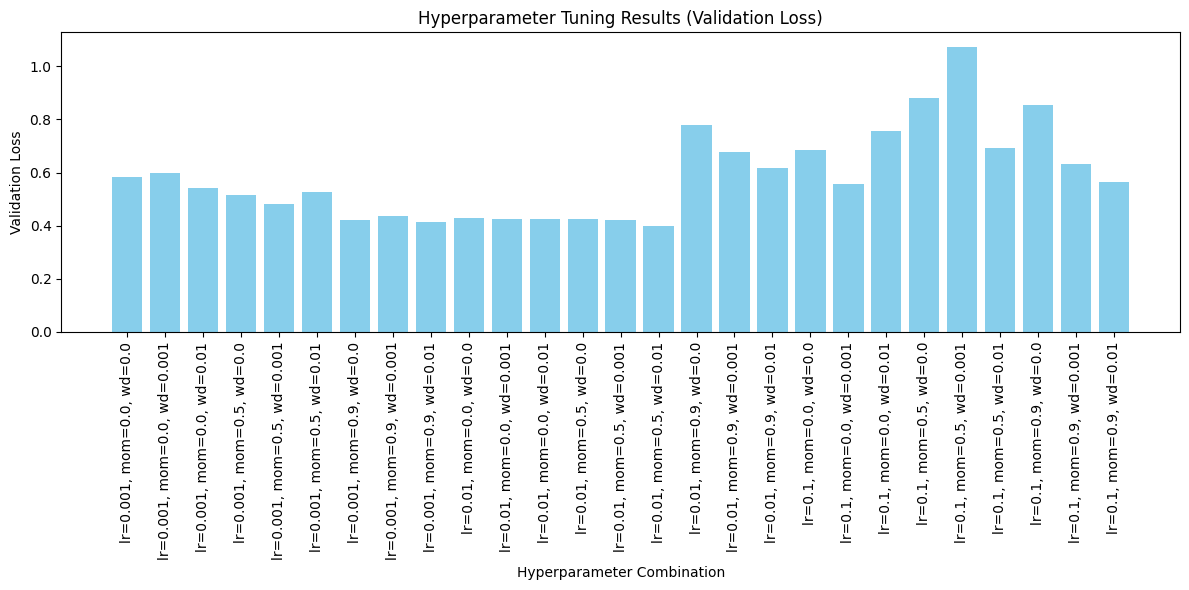

In [ ]:
import itertools

# Create a list of hyperparameter combinations tested
hyperparameter_combinations = [f"lr={lr}, mom={momentum}, wd={weight_decay}" for lr, momentum, weight_decay in itertools.product(param_grid['lr'], param_grid['momentum'], param_grid['weight_decay'])]

# Create a list of corresponding validation losses
validation_losses = []
for lr, momentum, weight_decay in itertools.product(param_grid['lr'], param_grid['momentum'], param_grid['weight_decay']):
    # Assuming train_model returns val_losses as the 4th element
    _, _, _, val_losses = train_model(best_topology, lr=lr, momentum=momentum, weight_decay=weight_decay, epochs=100)
    validation_losses.append(val_losses[-1]) # Get the final validation loss

# Create a bar plot to visualize the validation loss for each hyperparameter combination
plt.figure(figsize=(12, 6))
plt.bar(hyperparameter_combinations, validation_losses, color='skyblue')

# Label the axes and set the title
plt.xlabel("Hyperparameter Combination")
plt.ylabel("Validation Loss")
plt.title("Hyperparameter Tuning Results (Validation Loss)")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()



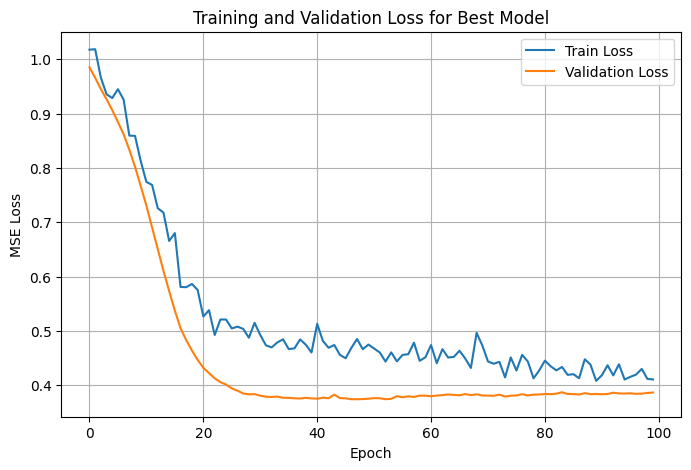

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses_final, label='Train Loss')
plt.plot(val_losses_final, label='Validation Loss')
plt.title('Training and Validation Loss for Best Model')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()